C:\Users\zeesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zeesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

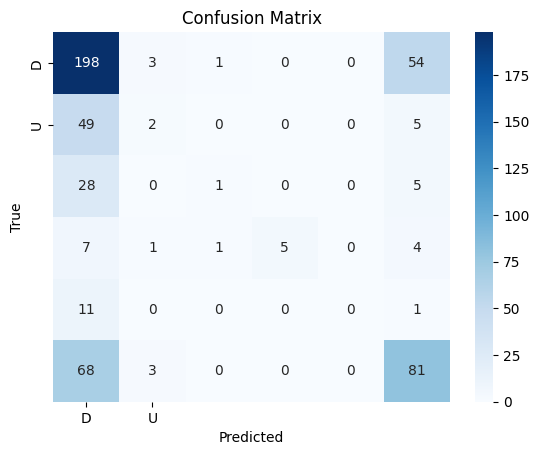

Accuracy: 0.5435606060606061
Classification Report:
                      precision    recall  f1-score   support

                   D       0.55      0.77      0.64       256
                   E       0.22      0.04      0.06        56
                   N       0.33      0.03      0.05        34
                   R       1.00      0.28      0.43        18
Split Family Fortune       0.00      0.00      0.00        12
                   U       0.54      0.53      0.54       152

            accuracy                           0.54       528
           macro avg       0.44      0.27      0.29       528
        weighted avg       0.50      0.54      0.49       528



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('C:/Users/zeesh/Downloads/Billionaires Statistics Dataset .csv')

# Handle missing values for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handle missing values for non-numeric columns (you may choose a different strategy)
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna('Unknown')

# Convert relevant columns to numeric type
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define features (X) and target variable (y)
X = df[['rank', 'finalWorth', 'age', 'cpi_country', 'gdp_country', 'total_tax_rate_country' , 'cpi_country', 'gdp_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'total_tax_rate_country']]
y = df['status']

# Encode categorical variables (you may need to customize this based on your dataset)
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['D', 'U'], yticklabels=['D', 'U'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')
